In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
with open('./data/converted_crime_data/Crime_pass5_no_tracts.csv') as f:
    data = [r for r in csv.reader(f)]

In [3]:
list(enumerate(data[0]))

[(0, 'address'),
 (1, 'apt'),
 (2, 'case'),
 (3, 'primary_offense'),
 (4, 'offense_code'),
 (5, 'offense'),
 (6, 'date_rept'),
 (7, 'date_occu'),
 (8, 'hour_occu'),
 (9, 'date_fnd'),
 (10, 'hour_fnd'),
 (11, 'fid'),
 (12, 'x'),
 (13, 'y')]

In [4]:
from datetime import datetime

In [5]:
dates = [
    datetime.strptime(row[7], '%Y-%m-%d')
    for row in data[1:]
]

In [6]:
from collections import Counter
crimes_per_day = Counter(dates)

In [7]:
sorted_crimes_per_day = sorted(crimes_per_day.items(), key=lambda x: x[0])

In [8]:
dates, counts = zip(*sorted_crimes_per_day)

In [9]:
x = np.array(dates)

In [10]:
y = np.array(counts)

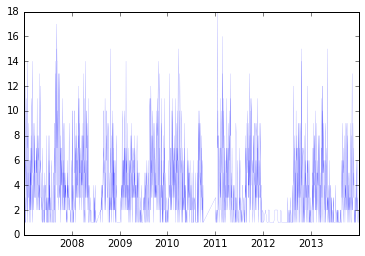

In [11]:
plt.plot(x, y, lw=0.1)

In [12]:
from datetime import datetime
import matplotlib.dates as mdates
def plot_year(year):
    crimes_per_day = [tup for tup in sorted_crimes_per_day if tup[0].year == year]
    dates_, counts_ = zip(*crimes_per_day)
    
    x = np.array((datetime(year, 1, 1), ) + dates_ + (datetime(year, 12, 31), ))
    y = np.array((0,) + counts_ + (0,))
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
    plt.bar(x, y, align='center')
    plt.title('Crimes Per Day ({})'.format(year))
    plt.gcf().autofmt_xdate()
    plt.show()

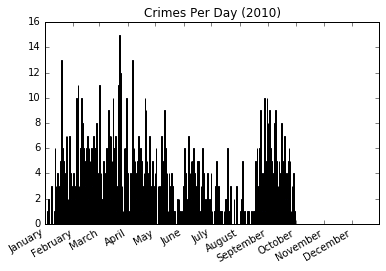

In [13]:
plot_year(2010)

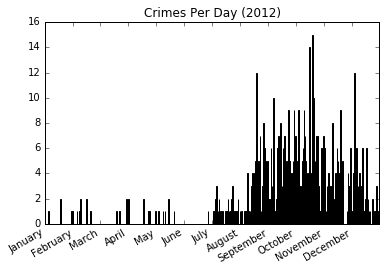

In [14]:
plot_year(2012)

In [15]:
crimes_per_year = Counter(tup[0].year for tup in sorted_crimes_per_day)

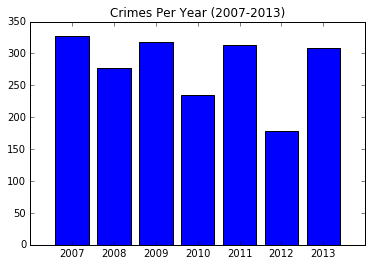

In [16]:
from matplotlib.ticker import FixedFormatter
years, counts_years = zip(*crimes_per_year.items())

plt.gca().xaxis.set_major_formatter(FixedFormatter(('',) + years))
plt.bar(np.array(years), np.array(counts_years), align='center')
plt.title('Crimes Per Year ({}-{})'.format(min(years), max(years)))
plt.show()

fig = plt.gcf()
fig.set_size_inches(8.5, 11)
# fig.savefig('crimes_per_year.png', dpi=150)